# Boston House Price Predictions

**Housing Values in Suburbs of Boston**

The medv variable is the target variable.

**Data description**

The Boston data frame has 506 rows and 14 columns.<br/>

This data frame contains the following columns:<br/>

crim    per capita crime rate by town.<br/>

zn    proportion of residential land zoned for lots over 25,000 sq.ft.<br/>

indus    proportion of non-retail business acres per town.<br/>

chas    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).<br/>

nox    nitrogen oxides concentration (parts per 10 million).<br/>

rm    average number of rooms per dwelling.<br/>

age    proportion of owner-occupied units built prior to 1940.<br/>

dis    weighted mean of distances to five Boston employment centres.<br/>

rad    index of accessibility to radial highways.<br/>

tax    full-value property-tax rate per \$10,000.<br/>

ptratio    pupil-teacher ratio by town.<br/>

black    1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.<br/>

lstat    lower status of the population (percent).<br/>

medv    median value of owner-occupied homes in \$1000s.<br/>

In [1]:
# importing requisite libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
from sklearn.grid_search import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/home/mayank/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/mayank/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#reading training data
train = pd.read_csv('train.csv')
train.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [3]:
train.head(5)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
train.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


After describing the train dataframe we know that there are no missing values in the train dataset as count for all are same

In [5]:
val = ['rm', 'lstat', 'ptratio', 'medv']
train = train[val]

In [6]:
prices = train['medv']
features = train.drop('medv', axis = 1)

In [7]:
print("The train model have {0} observation and each having {1} features ".format(*train.shape))

The train model have 333 observation and each having 4 features 


**Question 1 - Feature Observation**<br/>
As a reminder, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):<br/><br/>

'RM' is the average number of rooms among homes in the neighborhood.<br/>
'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).<br/>
'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.<br/><br/>
Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an increase in the value of 'MEDV' or a decrease in the value of 'MEDV'? Justify your answer for each.<br/>
Hint: Would you expect a home that has an 'RM' value of 6 be worth more or less than a home that has an 'RM' value of 7?<br/><br/>

Answer:<br/><br/>

RM : For a higher RM, one would expect to observe a higher MEDV.<br/>
This is because more rooms would imply more space, thereby costing more, taking all other factors constant.<br/><br/>
LSTAT : For a higher LSTAT, one would expect to observe a a lower MEDV.<br/>
The social milieux in an area dominated by "lower class" citizens may not be conducive for young children. It may also be relatively unsafe compared to an area dominated by "upper class" citizens. Hence an area with more "lower class" citizens would lower demand, hence lower prices.<br/><br/>
PTRATIO : For a higher LSTAT, one would expect to observe a lower MEDV.<br/>
This is because there would be a lower teacher-to-student ratio resulting in less attention dedicated to each student that may impair their performance in school. Typically this is the scenario in public/state schools compared to private schools. And the prices of houses around public schools are generally lower than those around private schools. Hence one would expect a lower price given a high student-to-teacher ratio due to a lower demand for houses in such areas.<br/><br/>
Personal note: These are merely based on intuition. These statements will be validated in the subsequent parts of this project.<br/>

**Visualization**

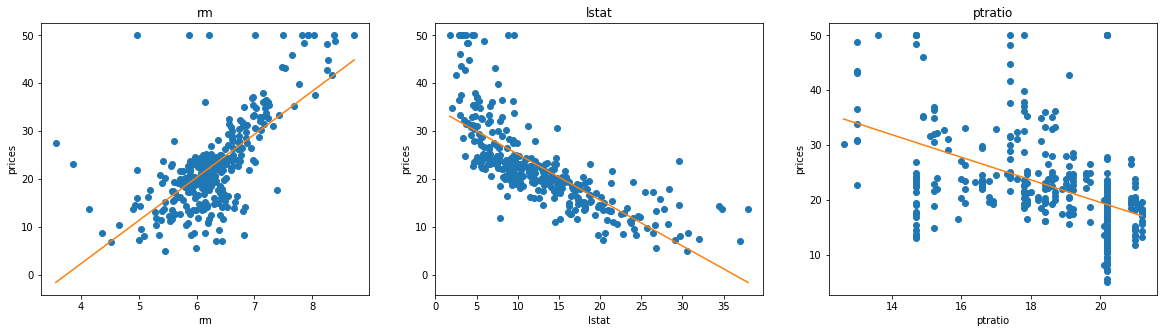

In [8]:
# Using pyplot
plt.figure(figsize=(20, 5))

# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = train[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

**Identifying when a model is suffering from high bias or high variance.**

It is easy to identify whether the model is suffering from a high bias or a high variance.<br/><br/>
High variance models have a gap between the training and validation scores.
This is because it is able to fit the model well but unable to generalize well resulting in a high training score but low validation score.<br/><br/>
High bias models have have a small or no gap between the training and validations scores.
This is because it is unable to fit the model well and unable to generalize well resulting in both scores converging to a similar low score.

**Grid Search**<br/>
What is the grid search technique and how it can be applied to optimize a learning algorithm?
<br/>
Answer:
<br/>
In essence, the grid search technique allows one to define a grid of parameters that will be searched using K-fold cross-validation.
<br/>
Importantly, the grid search technique exhaustively tries every combination of the provided hyper-parameter values in order to find the best model.<br/>
One can then find the highest cross-validation accuracy that matches with the corresponding parameters that optimizes the learning algorithm.<br/>
<br/><br/>
Pro tip: RandomizedSearchCV
<br/>

Although we will be using GridSearchCV, it may be computationally expensive for a bigger dataset.<br/>
There are other techniques that could be used for hyperparameter optimization in order to save time like RandomizedSearchCV, in this case instead of exploring the whole parameter space just a fixed number of parameter settings is sampled from the specified distributions.<br/>
This proves useful when we need to save time but is not necessary in cases in cases like ours where the data set is relatively small.


In [9]:
#Train - Test Splits
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [10]:
# Check if split is actually correct
# We can see it's roughly 80% train and 20% train
# So we can proceed!
print(features.shape[0])
print(float(X_train.shape[0]) / float(features.shape[0]))
print(float(X_test.shape[0]) / float(features.shape[0]))

333
0.7987987987987988
0.2012012012012012


**Cross-Validation**<br/>
What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?<br/>
Hint: Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?<br/><br/>

Answer:<br/><br/>

K-fold cross-validation summary:<br/>
<ul>
<li>Dataset is split into K "folds" of equal size.</li>
<li>Each fold acts as the testing set 1 time, and acts as the training set K-1 times.</li>
<li>Average testing performance is used as the estimate of out-of-sample performance.</li>
<li>Also known as cross-validated performance.</li>
</ul><br/>

Benefits of k-fold cross-validation:<br/>
<ul>
<li>More reliable estimate of out-of-sample performance than train/test split.</li>
<li>Reduce the variance of a single trial of a train/test split.</li>
<li>Hence, with the benefits of k-fold cross-validation, we're able to use the average testing accuracy as a benchmark to decide which is the most optimal set of parameters for the learning algorithm.</li>
<li>If we do not use a cross-validation set and we run grid-search, we would have different sets of optimal parameters due to the fact that without a cross-validation set, the estimate of out-of-sample performance would have a high variance.</li>
<li>In summary, without k-fold cross-validation the risk is higher that grid search will select hyper-parameter value combinations that perform very well on a specific train-test split but poorly otherwise.</li>
</ul><br/>
Limitation of k-fold cross-validation:
<br/>
It does not work well when data is not uniformly distributed (e.g. sorted data).

**Using GridSearchCV**

In [11]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)

    # Return the score
    return score

In [12]:
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    # ShuffleSplit works iteratively compared to KFOLD
    # It saves computation time when your dataset grows
    # X.shape[0] is the total number of elements
    # n_iter is the number of re-shuffling & splitting iterations.
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    # Instantiate
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    dt_range = np.arange(1, 11)
    params = dict(max_depth=dt_range)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    # We initially created performance_metric using R2_score
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    # You would realize we manually created each, including scoring_func using R^2
    grid = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

**Using RandomizedSearchCV **<br/>
I have specifically changed the function's name so it does not clash with the original question

In [13]:
# Create new similar function
def fit_model_2(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    # ShuffleSplit works iteratively compared to KFOLD
    # It saves computation time when your dataset grows
    # X.shape[0] is the total number of elements
    # n_iter is the number of re-shuffling & splitting iterations.
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    # Instantiate
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    dt_range = np.arange(1, 11)
    params = dict(max_depth=dt_range)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    # We initially created performance_metric using R2_score
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    # You would realize we manually created each, including scoring_func using R^2
    rand = RandomizedSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    rand = rand.fit(X, y)

    # Return the optimal model after fitting the data
    return rand.best_estimator_

Using GridSearchCV

In [14]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 3 for the optimal model.


In [15]:
# Explanation of how we got the 'max_depth' param
# First we fit the model
# Then we use get_params() to get the optimal parameters
# As you can see here, it's a dictionary
reg = fit_model(X_train, y_train)
reg.get_params()

{'criterion': 'mse',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

Using RandomSearchCV

In [16]:
# Fit the training data to the model using grid search
reg_2 = fit_model_2(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg_2.get_params()['max_depth']))
print("\n")
reg_2.get_params()

Parameter 'max_depth' is 3 for the optimal model.




{'criterion': 'mse',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

**Predicting on test.csv**

In [17]:
test = pd.read_csv('test.csv')
test = test[['rm', 'lstat', 'ptratio']]

In [18]:
test['prediction'] = reg.predict(test)

In [19]:
test.to_csv('predictionresult.csv')